In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 2
b = 1 
sigma = 0.02

N = 100
x_min = 0.01
x_max = 10.0

x_n = np.random.uniform(x_min, x_max, N)

def f(x, a, b): 
    return 1 / (a * np.log(x + 1) + b)

xi_n = np.random.normal(0, sigma, N)
y_n = f(x_n, a, b) + xi_n

data = np.column_stack((x_n, y_n))
np.savetxt('data.csv', data, delimiter=',')


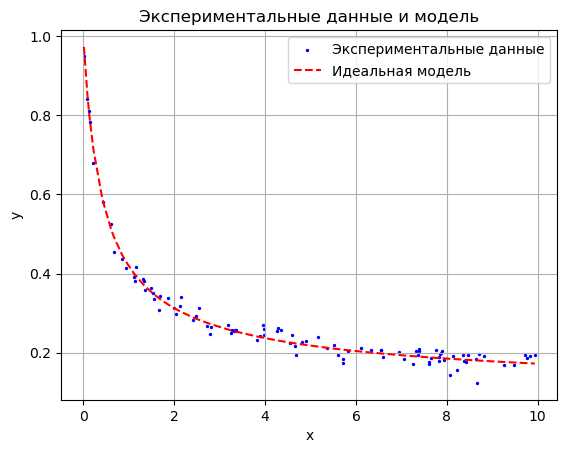

In [2]:

data = np.loadtxt('data.csv', delimiter=',')

x_n = data[:, 0]
y_n = data[:, 1]

idx = np.argsort(x_n)
x_sort = x_n[idx]
y_sort = f(x_sort, a, b)

plt.scatter(x_n, y_n, s=2, 
            label='Экспериментальные данные', 
            color='b')

plt.plot(x_sort, y_sort,
         label='Идеальная модель', 
         color='r', 
         linestyle='--')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.title('Экспериментальные данные и модель')
plt.grid()
plt.show()


Оценки параметров:
a = 1.9983
b = 0.9944


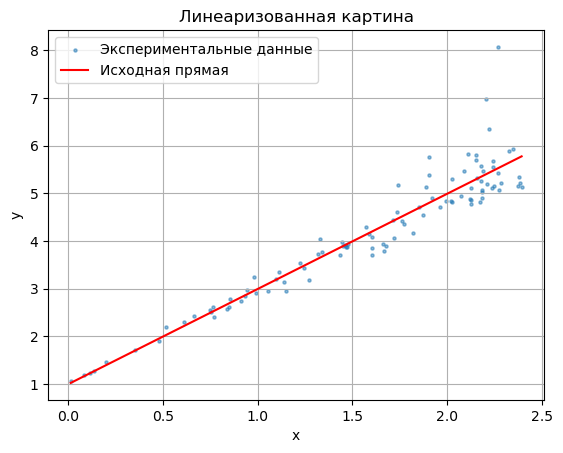

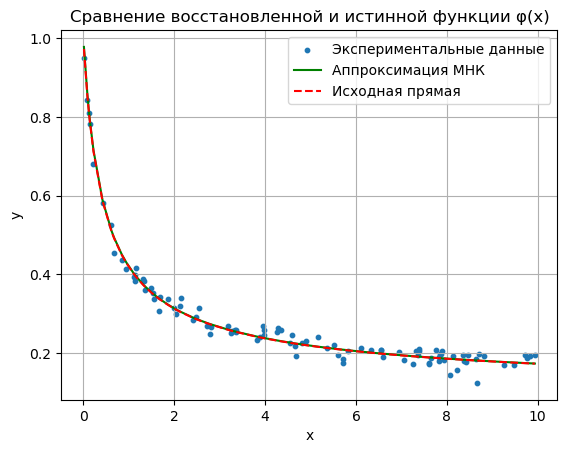

In [3]:

mask = y_n > 0

X = np.log(x_n[mask] + 1)
Y = 1 / y_n[mask]

XS = np.sum(X)
XS2 = np.sum(X**2)
X_matrix = np.array([[len(X), XS], [XS, XS2]])

YS = np.sum(Y)
XYS = np.sum(Y * X)
XY_vector = (np.array([YS, XYS]))

parameters = np.dot(np.linalg.inv(X_matrix), XY_vector)

a_est = parameters[1]
b_est = parameters[0]

print('Оценки параметров:')
print(f'a = {a_est:.4f}')
print(f'b = {b_est:.4f}')

plt.scatter(X, Y, alpha=0.5, s=5, 
            label='Экспериментальные данные')

plt.plot(np.sort(X), a_est * np.sort(X) + b_est,
         color='r', label='Исходная прямая')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Линеаризованная картина')
plt.legend()
plt.grid()
plt.show()

plt.scatter(x_n[mask], y_n[mask], s=10,
            label='Экспериментальные данные')
plt.plot(x_sort, f(x_sort, a_est, b_est),
         color='g', label='Аппроксимация МНК')
plt.plot(x_sort, f(x_sort, a, b),
         color='r', linestyle='--', label='Исходная прямая')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Сравнение восстановленной и истинной функции φ(x)')
plt.legend()
plt.grid()
plt.show()
